In [1]:
from google_images_download import google_images_download   #importing the library
from fastai.vision import *

In [2]:
bs = 32
path = 'E:\\OneDrive\\Doutorado\\Cursos\\FastAI_Pierre\\Aula02-30out2019\\Atividade\\downloads'

##  ImageDataBunch

In [3]:
np.random.seed(53)
data = ImageDataBunch.from_folder(path, train="", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

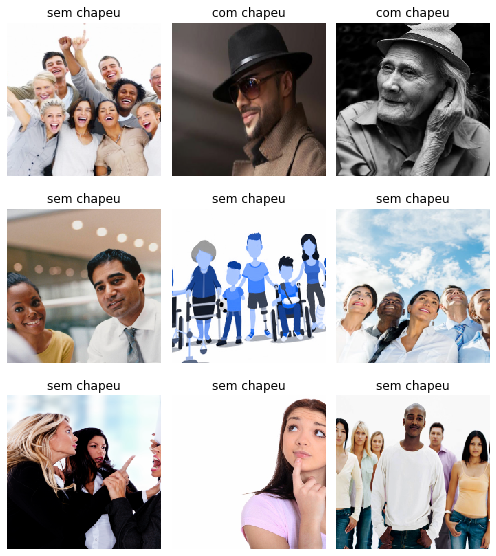

In [4]:
data.classes
data.show_batch(rows=3, figsize=(7,8))

In [5]:
data

ImageDataBunch;

Train: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
com chapeu,com chapeu,com chapeu,com chapeu,com chapeu
Path: E:\OneDrive\Doutorado\Cursos\FastAI_Pierre\Aula02-30out2019\Atividade\downloads;

Valid: LabelList (28 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sem chapeu,sem chapeu,com chapeu,com chapeu,sem chapeu
Path: E:\OneDrive\Doutorado\Cursos\FastAI_Pierre\Aula02-30out2019\Atividade\downloads;

Test: None

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['com chapeu', 'sem chapeu'], 2, 113, 28)

## Model

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

## Treinando o modelo! Treine qts vezes achar necessário

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.327678,0.629197,0.250000,00:26
1,0.829715,0.614565,0.285714,00:22
2,0.601226,0.325089,0.071429,00:22
3,0.458703,0.270140,0.071429,00:22


In [9]:
learn.save('Stage-1')

In [10]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.108755,0.210950,0.071429,00:22
1,0.058851,0.193513,0.035714,00:22
2,0.075611,0.113718,0.035714,00:22
3,0.061831,0.085541,0.071429,00:21
4,0.049786,0.120336,0.035714,00:21
5,0.045563,0.135234,0.035714,00:22
6,0.042678,0.129037,0.035714,00:23
7,0.053898,0.142041,0.035714,00:24


## Analise o Learning Rate ideal para o treinamento e treine mais o seu modelo.

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

In [ ]:
learn.save('Stage-1')

## Caso o modelo ainda tenha um erro alto ou vc queira abaixar ainda mais o erro, de 'unfreeze' no modelo e treine mais um pouco.

## Tome cuidado, salve seu modelo antes, pois é comum o erro aumentar nas primeiras epocas de treinamento após o unfreeze.

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

In [ ]:
learn.save('Stage-2')

## Agora é a 3ª e das 3 etapas principais, a interpretação do seu modelo.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
interp.plot_top_losses(9, figsize=(15,11)) #,heatmat=True

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)